In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import pandas as pd
from code.tasks.link_prediction import LinkPredictor
from code.dataset import GraphDataset

In [2]:
data_path = 'data'
dataset = 'Router'

# Load dataset
graph_data = GraphDataset(data_path)
graph_data.load_graph(dataset)
graph, node_subjects = graph_data.graph, graph_data.node_subjects

if node_subjects.empty:
        node_subjects = None

# Calculate graph statistics
num_edges = graph.number_of_edges()
num_nodes = graph.number_of_nodes()
print("\nGraph Loaded:")
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")


Graph Loaded:
Number of nodes: 2708
Number of edges: 5278


In [3]:
# run link prediction
clf = LinkPredictor(graph=graph)
df_result = pd.DataFrame()
for method in ['DNE', 'GraRep', 'HOPE', 'LINE', 'NetMF', 'LLE', 'N2V', 'SVD']:
    result = clf.train_and_evaluate(method, node_subjects, cv_fold=5, n_trials=1)
    df_result = pd.concat([df_result, result])

Generate DNE embeddings for Train Graph
Epoch 1/5
779/779 [==============================] - 11s 12ms/step - loss: 0.2079 - auc_roc: 0.7473
Epoch 2/5
779/779 [==============================] - 11s 14ms/step - loss: 0.1082 - auc_roc: 0.9188
Epoch 3/5
779/779 [==============================] - 10s 13ms/step - loss: 0.0952 - auc_roc: 0.9353
Epoch 4/5
779/779 [==============================] - 9s 11ms/step - loss: 0.0897 - auc_roc: 0.9423
Epoch 5/5
779/779 [==============================] - 9s 11ms/step - loss: 0.0857 - auc_roc: 0.9474
Generate GraRep embeddings for Train Graph
Generate HOPE embeddings for Train Graph
Generate LINE embeddings for Train Graph
Generate NetMF embeddings for Train Graph
Running NetMF for a small window size...
Compute matrix %d-th power 1
Compute matrix %d-th power 2
Compute matrix %d-th power 3
Compute matrix %d-th power 4
Compute matrix %d-th power 5
Generate LLE embeddings for Train Graph
Generate N2V embeddings for Train Graph
Generate SVD embeddings for T

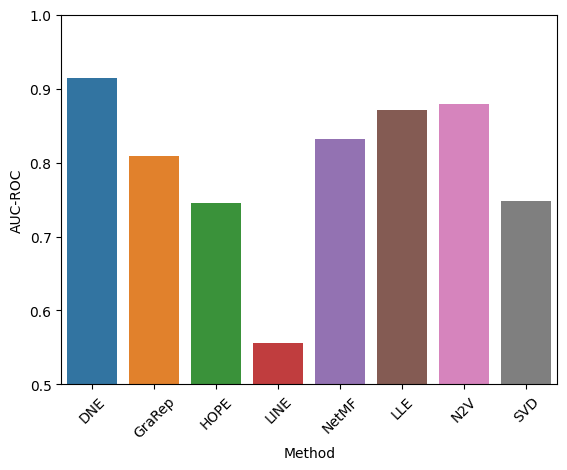

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='method', y='auc_roc', data=df_result, hue='method')
plt.xlabel('Method')
plt.ylabel('AUC-ROC')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.show()